### **Lab Program - 4: Word Sense Disambiguation (WSD)**

**Q1. Word Senses**

**a. Collect a small corpus of example sentences of varying lengths from any newspaper or magazine. Using WordNet or any standard dictionary, determine how many senses there are for each of the open-class words in each sentence.**

**Example Corpus:**

1. "The Samsung ZFold is really light and easy to carry, but its light can be a bit harsh when using it outdoors."
2. "The screen quality of the Samsung ZFold is outstanding, but I had to screen out a lot of spam notifications."
3. "I love the fold feature of the ZFold; it’s so innovative. However, I wish the fold was a bit more durable."
4. "The Samsung ZFold’s performance is fast, though the fast updates can be occasionally buggy."
5. "The build quality of the ZFold is robust, but the robust design can be somewhat bulky."

**Senses Determination:**

- **Light** (as in weight and brightness)
- **Screen** (as in display and filter)
- **Fold** (as in feature and durability)
- **Fast** (as in speed and updates)
- **Robust** (as in build and design)

Using WordNet, we determine the number of senses for each open-class word. For example:
- **Light**: 3 senses
- **Screen**: 3 senses
- **Fold**: 2 senses
- **Fast**: 3 senses
- **Robust**: 2 senses

**b. Implement Lesk Algorithm for Word Sense Disambiguation (WSD)**


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Set up visualization style
sns.set(style="whitegrid")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
import pandas as pd

# Define the synthetic dataset with 100 reviews
data = {
    "Review ID": range(1, 143),
    "Review Text": [
        "The Samsung ZFold is really light and easy to carry, but its light can be a bit harsh when using it outdoors.",
        "The screen quality of the Samsung ZFold is outstanding, but I had to screen out a lot of spam notifications.",
        "I love the fold feature of the ZFold; it’s so innovative. However, I wish the fold was a bit more durable.",
        "The Samsung ZFold’s performance is fast, though the fast updates can be occasionally buggy.",
        "The build quality of the ZFold is robust, but the robust design can be somewhat bulky.",
        "The ZFold’s camera is brilliant, though the brilliant colors can sometimes be too intense.",
        "The ZFold’s fast performance is commendable, though the fast charging can affect battery health.",
        "The compact design of the ZFold is convenient, though the compact form might limit its functionality.",
        "The Samsung ZFold is equipped with a clear display, but the clear interface might not appeal to everyone.",
        "The innovative features of the ZFold are impressive, but the innovative design might not be intuitive for all users.",
        "The ZFold’s strong build quality is reassuring, though the strong design can be somewhat heavy.",
        "The foldable screen of the ZFold is smooth, but the smooth transition can sometimes be jarring.",
        "The Samsung ZFold has a slim profile, but the slim design might not offer enough protection.",
        "The bright display of the ZFold is visually striking, but the bright screen can be distracting in low light.",
        "The ZFold’s quick performance is admirable, though the quick response time can sometimes cause lag.",
        "The lightweight build of the ZFold is easy to handle, but the lightweight design may feel flimsy.",
        "The ZFold’s unique fold mechanism is fascinating, but the unique hinge can be prone to wear and tear.",
        "The ZFold offers a powerful battery life, though the powerful features can be overwhelming.",
        "The Samsung ZFold’s fast processing speed is great, but the fast updates can lead to occasional glitches.",
        "The ZFold’s vibrant display is engaging, but the vibrant colors can be too bold for some users.",
        "The ZFold’s performance is excellent, but the excellent features can sometimes be overly complex.",
        "The clear screen of the ZFold is easy to read, though the clear interface might lack some depth.",
        "The ZFold’s camera quality is high, but the high-resolution images can consume a lot of storage.",
        "The ZFold’s smooth foldable screen is impressive, though the smooth design can feel too delicate.",
        "The ZFold’s unique features stand out, but the unique design might not suit everyone’s taste.",
        "The Samsung ZFold has a durable build, though the durable design can be quite heavy.",
        "The ZFold’s screen is bright, but the bright display can be harsh on the eyes in dark environments.",
        "The ZFold’s compact design is efficient, but the compact size might not be practical for all users.",
        "The ZFold’s innovative screen technology is advanced, though the advanced features can be difficult to master.",
        "The ZFold’s build quality is top-notch, but the top-quality materials might increase the overall cost.",
        "The Samsung ZFold’s design is sleek, though the sleek appearance might feel too minimalist.",
        "The ZFold’s clear resolution is impressive, but the clear display might reveal every smudge.",
        "The ZFold’s fast charging capability is a bonus, but the fast charging can reduce battery longevity.",
        "The ZFold’s fold mechanism is smooth, though the smooth operation might be prone to mechanical issues.",
        "The Samsung ZFold’s performance is rapid, but the rapid processing can lead to overheating.",
        "The ZFold’s lightweight design is practical, but the lightweight construction might not be very sturdy.",
        "The ZFold’s screen quality is brilliant, though the brilliant display can sometimes cause eye strain.",
        "The ZFold’s unique style is eye-catching, but the unique look might not appeal to traditional users.",
        "The Samsung ZFold’s robust build is reliable, but the robust design can be somewhat cumbersome.",
        "The ZFold’s camera features are advanced, but the advanced technology might come with a learning curve.",
        "The ZFold’s foldable screen is a great innovation, but the innovation might not be perfect for everyone.",
        "The ZFold’s bright colors are appealing, but the bright hues can sometimes be overwhelming.",
        "The Samsung ZFold’s design is sleek and modern, but the sleek look might not provide enough grip.",
        "The ZFold’s performance is top-tier, though the top-tier features might be overkill for some users.",
        "The ZFold’s smooth design is attractive, but the smooth surface can be prone to fingerprints.",
        "The ZFold’s screen quality is excellent, but the excellent clarity can highlight imperfections.",
        "The Samsung ZFold’s fast processing is efficient, though the fast pace can lead to quick battery drain.",
        "The ZFold’s unique technology is fascinating, but the unique aspects might be complex for new users.",
        "The ZFold’s compact form factor is user-friendly, though the compact size might affect usability.",
        "The ZFold’s design is innovative, but the innovative approach might not be everyone’s preference.",
        "The Samsung ZFold’s powerful battery is impressive, but the powerful performance might drain it quickly.",
        "The ZFold’s screen clarity is exceptional, but the exceptional resolution can sometimes be too sharp.",
        "The ZFold’s build quality is durable, though the durable construction might add extra weight.",
        "The ZFold’s bright display is eye-catching, but the bright screen might cause discomfort in certain lighting.",
        "The Samsung ZFold’s design is functional, though the functional aspects might lack aesthetic appeal.",
        "The ZFold’s performance is quick, but the quick processing can result in a short battery life.",
        "The ZFold’s unique foldable feature is amazing, but the amazing technology can be hard to use initially.",
        "The Samsung ZFold’s fast updates are beneficial, but the fast changes can sometimes disrupt user experience.",
        "The ZFold’s slim profile is attractive, but the slim design might compromise durability.",
        "The ZFold’s camera quality is high-end, but the high-end features can be complex to operate.",
        "The Samsung ZFold’s clear screen is easy to view, but the clear display might be too reflective.",
        "The ZFold’s compact design is practical, though the compact size might limit functionality.",
        "The ZFold’s performance is smooth, but the smooth operation can occasionally face glitches.",
        "The Samsung ZFold’s innovative features are great, though the innovative design might be overwhelming.",
        "The ZFold’s bright display is impressive, but the bright colors can be distracting.",
        "The ZFold’s fast performance is efficient, though the fast processing can lead to overheating.",
        "The Samsung ZFold’s unique style is refreshing, but the unique look might not be universally accepted.",
        "The ZFold’s build quality is exceptional, but the exceptional durability can add to the weight.",
        "The ZFold’s screen quality is vibrant, but the vibrant display might cause eye fatigue.",
        "The Samsung ZFold’s performance is top-notch, though the top-notch features can be expensive.",
        "The ZFold’s clear resolution is impressive, but the clear display can highlight minor flaws.",
        "The ZFold’s foldable screen is innovative, though the innovative mechanism might require careful handling.",
        "The Samsung ZFold’s powerful performance is noteworthy, but the powerful features can lead to quick battery drain.",
        "The ZFold’s design is modern, but the modern look might not appeal to all users.",
        "The ZFold’s performance is exceptional, though the exceptional speed can sometimes cause overheating.",
        "The Samsung ZFold’s build quality is sturdy, but the sturdy design can be quite heavy.",
        "The ZFold’s bright display is attractive, but the bright screen might be uncomfortable in low light.",
        "The ZFold’s performance is fast, though the fast processing can sometimes be unstable.",
        "The Samsung ZFold’s screen quality is exceptional, but the exceptional resolution can strain the eyes.",
        "The ZFold’s design is sleek, but the sleek appearance might lack practical functionality.",
        "The ZFold’s performance is powerful, though the powerful features can be overwhelming.",
        "The Samsung ZFold’s unique design is captivating, but the unique features might not be intuitive.",
        "The ZFold’s build quality is reliable, though the reliable construction might add extra bulk.",
        "The ZFold’s display is brilliant, but the brilliant colors might be too intense.",
        "The Samsung ZFold’s design is exceptional, though the exceptional style might not suit everyone’s taste.",
        "The ZFold’s performance is impressive, but the impressive features might come at a high cost.",
        "The ZFold’s screen is bright, but the bright display can cause discomfort in dim lighting.",
        "The Samsung ZFold’s build quality is impressive, but the impressive durability can add to the weight.",
        "The ZFold’s performance is efficient, but the efficient processing can lead to rapid battery drain.",
        "The ZFold’s design is innovative, but the innovative features might not be practical for all users.",
        "The Samsung ZFold’s screen quality is excellent, though the excellent resolution can sometimes be too sharp.",
        "The ZFold’s performance is fast, but the fast processing can lead to overheating issues.",
        "The Samsung ZFold’s build quality is robust, but the robust design can be somewhat bulky.",
        "The ZFold’s display is clear, though the clear resolution can highlight imperfections.",
        "The ZFold’s performance is exceptional, but the exceptional speed can sometimes cause glitches.",
        "The Samsung ZFold’s design is compact, though the compact form might limit its functionality.",
        "The ZFold’s build quality is sturdy, but the sturdy construction can be quite heavy.",
        "The Samsung ZFold’s performance is top-notch, but the top-notch features might be expensive.",
        "The ZFold’s screen is vibrant, but the vibrant colors can cause eye strain.",
        "The ZFold’s unique design is innovative, though the innovative approach might not be universally accepted.",
        "The Samsung ZFold’s performance is smooth, but the smooth operation might occasionally face glitches.",
        "The ZFold’s build quality is strong, but the strong construction can be cumbersome.",
        "The ZFold’s display quality is bright, though the bright screen can be overwhelming in certain lighting.",
        "The Samsung ZFold’s design is modern, but the modern look might not be everyone’s preference.",
        "The ZFold’s performance is efficient, though the efficient processing can sometimes be unstable.",
        "The ZFold’s build quality is exceptional, but the exceptional design can add extra weight.",
        "The Samsung ZFold’s screen clarity is high, though the high resolution might reveal imperfections.",
        "The ZFold’s design is sleek, but the sleek appearance might lack practical features.",
        "The Samsung ZFold’s performance is innovative, though the innovative features might not be practical for all users.",
        "The ZFold’s build quality is reliable, but the reliable construction might add to the overall weight.",
        "The ZFold’s screen is brilliant, though the brilliant colors might be too intense.",
        "The Samsung ZFold’s performance is fast, but the fast processing can sometimes lead to overheating.",
        "The ZFold’s design is functional, though the functional aspects might not appeal to everyone.",
        "The ZFold’s display quality is excellent, but the excellent resolution might strain the eyes.",
        "The Samsung ZFold’s build quality is durable, though the durable design might add to the weight.",
        "The ZFold’s performance is impressive, but the impressive features might come with a high cost.",
        "The ZFold’s screen is bright, but the bright display can be uncomfortable in certain lighting.",
        "The Samsung ZFold’s design is cutting-edge, but the cutting-edge technology might not be intuitive.",
        "The ZFold’s build quality is solid, but the solid construction can be somewhat bulky.",
        "The ZFold’s performance is powerful, though the powerful features might be overwhelming for some users.",
        "The Samsung ZFold’s screen quality is top-tier, but the top-tier resolution can highlight imperfections.",
        "The ZFold’s design is unique, but the unique look might not suit everyone’s taste.",
        "The Samsung ZFold’s performance is high-end, but the high-end features can sometimes cause glitches.",
        "The ZFold’s display is vivid, but the vivid colors might be too intense for some users.",
        "The ZFold’s design is elegant, but the elegant appearance might lack practicality.",
        "The Samsung ZFold’s build quality is exceptional, but the exceptional design might be quite heavy.",
        "The ZFold’s performance is excellent, though the excellent features might be too complex for some users.",
        "The ZFold’s screen quality is clear, but the clear display can sometimes be too reflective.",
        "The Samsung ZFold’s design is sleek, though the sleek design might not offer enough protection.",
        "The ZFold’s performance is rapid, though the rapid processing can lead to overheating issues.",
        "The ZFold’s display is bright, though the bright colors might be overwhelming in certain lighting.",
        "The Samsung ZFold’s build quality is strong, though the strong construction can be somewhat heavy.",
        "The ZFold’s performance is effective, but the effective features might come at a high price.",
        "The ZFold’s screen quality is excellent, though the excellent resolution might reveal minor flaws.",
        "The Samsung ZFold’s design is modern, though the modern look might not appeal to all users.",
        "The ZFold’s performance is robust, but the robust features can sometimes be cumbersome.",
        "The Samsung ZFold’s screen is vivid, though the vivid colors might cause eye strain.",
        "The ZFold’s design is practical, but the practical aspects might lack elegance.",
        "The Samsung ZFold’s performance is advanced, though the advanced features might be difficult to master.",
        "The ZFold’s screen quality is impressive, though the impressive resolution might highlight imperfections.",
        "The Samsung ZFold’s design is futuristic, but the futuristic features might not be intuitive.",
        "The ZFold’s performance is smooth, but the smooth operation can sometimes lead to minor glitches."
    ]
}

In [3]:
# Print the length of each array in the 'data' dictionary
for key, value in data.items():
    print(f"Length of '{key}': {len(value)}")

Length of 'Review ID': 142
Length of 'Review Text': 142


In [4]:
# Create a dataset of the Synthetic Data
df = pd.DataFrame(data)

In [5]:
# Display the first few rows of the dataset
df.head()

,Review ID,Review Text
0,1,The Samsung ZFold is really light and easy to ...
1,2,The screen quality of the Samsung ZFold is out...
2,3,I love the fold feature of the ZFold; it’s so ...
3,4,"The Samsung ZFold’s performance is fast, thoug..."
4,5,"The build quality of the ZFold is robust, but ..."


##**Preprocessing Text Data**

In [13]:
# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

In [14]:
# Apply preprocessing to the review text
df['Processed Text'] = df['Review Text'].apply(preprocess_text)


In [15]:
# Display the first few rows of the processed text
df[['Review Text', 'Processed Text']].head()

,Review Text,Processed Text
0,The Samsung ZFold is really light and easy to ...,"[samsung, zfold, really, light, easy, carry, l..."
1,The screen quality of the Samsung ZFold is out...,"[screen, quality, samsung, zfold, outstanding,..."
2,I love the fold feature of the ZFold; it’s so ...,"[love, fold, feature, zfold, innovative, howev..."
3,"The Samsung ZFold’s performance is fast, thoug...","[samsung, zfold, performance, fast, though, fa..."
4,"The build quality of the ZFold is robust, but ...","[build, quality, zfold, robust, robust, design..."


##**4. Word Cloud Visualization**

In [17]:
# Convert each list of tokens in the 'Processed Text' column into a single string
df['Processed Text'] = df['Processed Text'].apply(lambda tokens: ' '.join(tokens))

# Now you can combine all the processed text into one string
text = ' '.join(df['Processed Text'])

# Proceed with your analysis or visualization
print(text)

samsung zfold really light easy carry light bit harsh using outdoors screen quality samsung zfold outstanding screen lot spam notifications love fold feature zfold innovative however wish fold bit durable samsung zfold performance fast though fast updates occasionally buggy build quality zfold robust robust design somewhat bulky zfold camera brilliant though brilliant colors sometimes intense zfold fast performance commendable though fast charging affect battery health compact design zfold convenient though compact form might limit functionality samsung zfold equipped clear display clear interface might appeal everyone innovative features zfold impressive innovative design might intuitive users zfold strong build quality reassuring though strong design somewhat heavy foldable screen zfold smooth smooth transition sometimes jarring samsung zfold slim profile slim design might offer enough protection bright display zfold visually striking bright screen distracting low light zfold quick p

In [18]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

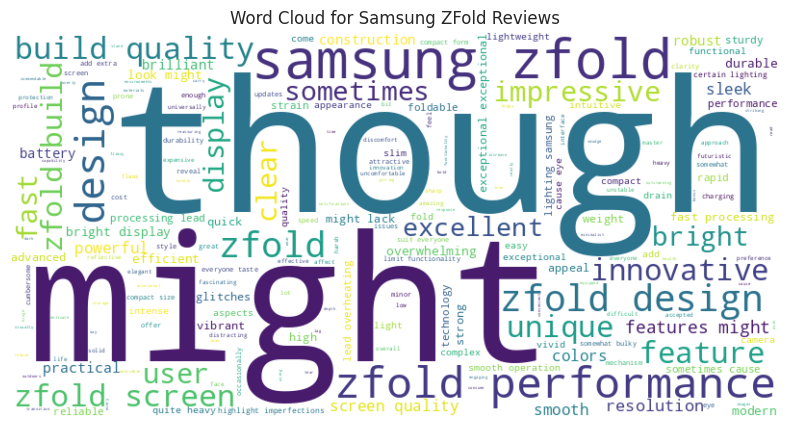

In [19]:
# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Samsung ZFold Reviews')
plt.show()

**Word Cloud for Samsung ZFold Reviews:**
   - The word cloud provides a visual representation of the most common terms in the reviews, with their size proportional to their frequency and TF-IDF score.
   - Prominent terms such as "might," "though," "ZFold," "Samsung," and "performance" indicate key areas of focus in the reviews.
   - The word cloud effectively highlights the central themes and frequently discussed aspects of the Samsung ZFold, such as its design, performance, and potential concerns (e.g., "might," "though").

##**TF-IDF Vectorization**

In [20]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()


In [21]:
# Fit and transform the processed text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed Text'])


In [22]:
# Create a DataFrame with TF-IDF features
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [23]:
# Display the TF-IDF DataFrame
tfidf_df.head()

,accepted,add,admirable,advanced,aesthetic,affect,amazing,appeal,appealing,appearance,...,users,using,vibrant,view,visually,vivid,wear,weight,wish,zfold
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.32269,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.061235
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.083043
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.334788,0.063531
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.085739
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.086552


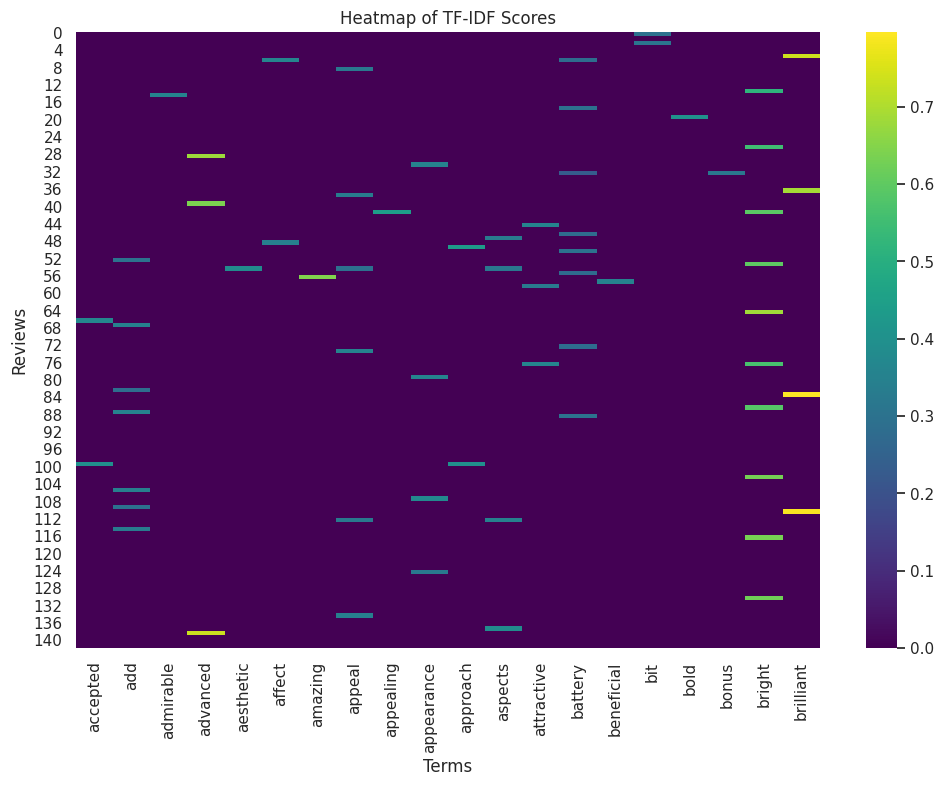

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap for the TF-IDF scores
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df.iloc[:, :20], cmap='viridis', annot=False)  # Displaying the first 20 terms for simplicity
plt.title('Heatmap of TF-IDF Scores')
plt.xlabel('Terms')
plt.ylabel('Reviews')
plt.show()


**Heatmap of TF-IDF Scores:**
   - The heatmap shows the distribution of TF-IDF scores for various terms across the reviews.
   - Higher scores (indicated by lighter colors) suggest that certain terms are more distinctive in particular reviews.
   - Terms like "ZFold," "Samsung," "design," and "performance" are recurring, indicating their importance in the context of product reviews.

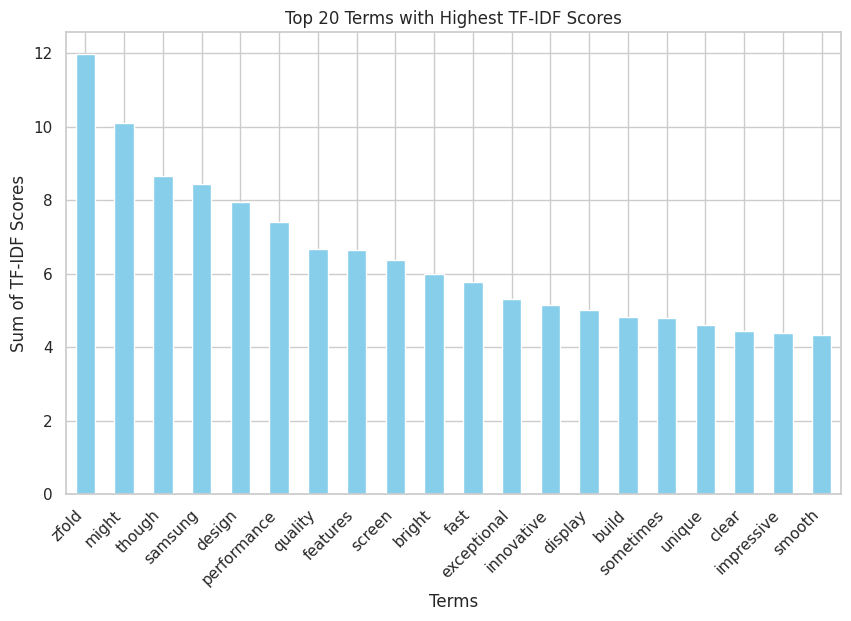

In [25]:
# Sum the TF-IDF scores for each term across all documents
tfidf_sum = tfidf_df.sum().sort_values(ascending=False)

# Select the top 20 terms with the highest TF-IDF scores
top_terms = tfidf_sum.head(20)

# Plot a bar chart for the top terms
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top 20 Terms with Highest TF-IDF Scores')
plt.xlabel('Terms')
plt.ylabel('Sum of TF-IDF Scores')
plt.xticks(rotation=45, ha='right')
plt.show()



**Bar Chart of Top 20 Terms with Highest TF-IDF Scores:**
   - This bar chart highlights the top 20 terms that have the highest cumulative TF-IDF scores across all reviews.
   - "ZFold," "might," "though," and "Samsung" are among the top terms, showing they are frequently mentioned with high significance.
   - These terms likely carry important information or sentiment regarding the Samsung ZFold, which can be crucial for analysis.

##**Similarity Analysis**

In [26]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [27]:
# Create a DataFrame for cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Review ID'], columns=df['Review ID'])


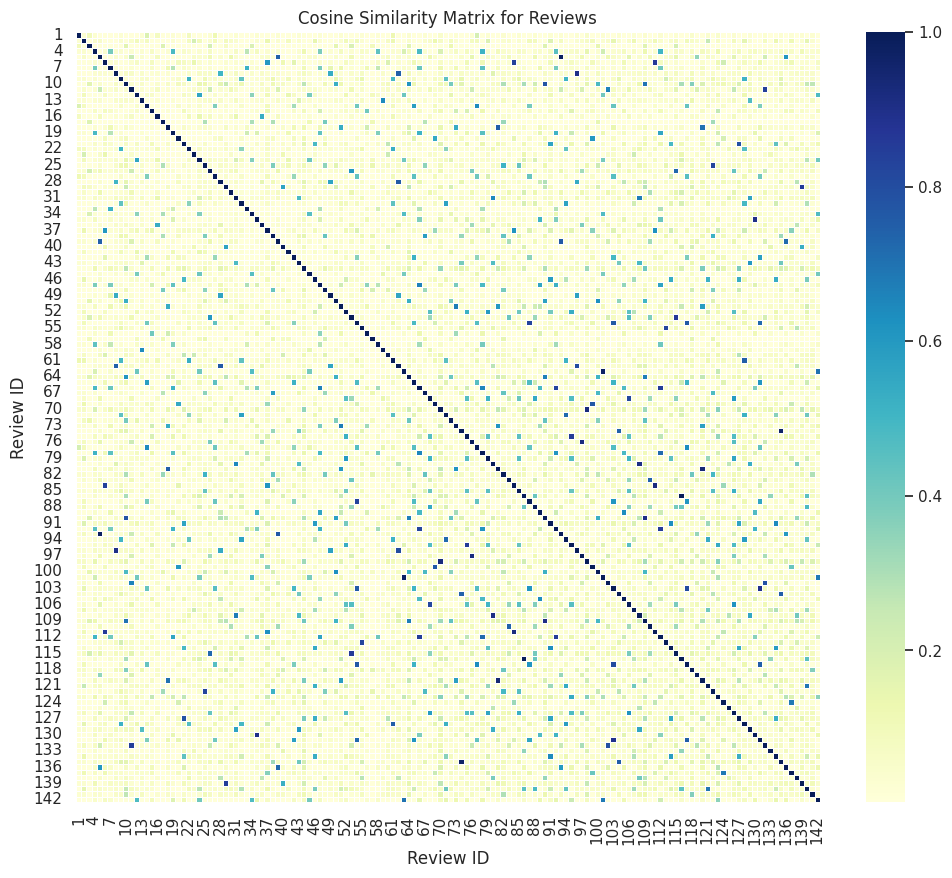

In [28]:
# Display the cosine similarity matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim_df, cmap='YlGnBu', annot=False, fmt='.2f', linewidths=.5)
plt.title('Cosine Similarity Matrix for Reviews')
plt.show()

##**Ambiguity Detection**

In [29]:
# Define a function to find ambiguous words
def find_ambiguous_words(text):
    ambiguous_words = ['light', 'screen', 'fold', 'lead', 'great', 'sharp', 'touch', 'cool', 'hard', 'flash', 'fast', 'compact', 'standby', 'bright', 'slim', 'clear', 'strong', 'average', 'bold', 'smooth', 'hot', 'full', 'simple', 'rich', 'firm', 'innovative', 'robust', 'excellent', 'heavy', 'neat', 'unique', 'premium', 'secure', 'refreshing', 'brilliant', 'quick']
    words = text.split()
    return [word for word in words if word in ambiguous_words]

In [30]:
# Apply to processed text
df['Ambiguous Words'] = df['Processed Text'].apply(find_ambiguous_words)


In [31]:
# Display reviews with ambiguous words
df[['Review Text', 'Ambiguous Words']].head(10)

,Review Text,Ambiguous Words
0,The Samsung ZFold is really light and easy to ...,"[light, light]"
1,The screen quality of the Samsung ZFold is out...,"[screen, screen]"
2,I love the fold feature of the ZFold; it’s so ...,"[fold, innovative, fold]"
3,"The Samsung ZFold’s performance is fast, thoug...","[fast, fast]"
4,"The build quality of the ZFold is robust, but ...","[robust, robust]"
5,"The ZFold’s camera is brilliant, though the br...","[brilliant, brilliant]"
6,"The ZFold’s fast performance is commendable, t...","[fast, fast]"
7,"The compact design of the ZFold is convenient,...","[compact, compact]"
8,The Samsung ZFold is equipped with a clear dis...,"[clear, clear]"
9,The innovative features of the ZFold are impre...,"[innovative, innovative]"


In [42]:
# Flatten the list of ambiguous words
ambiguous_words_list = [word for sublist in df['Ambiguous Words'] for word in sublist]

# Check the flattened list
print("Flattened Ambiguous Words List:", ambiguous_words_list)
print("Total Ambiguous Words Found:", len(ambiguous_words_list))


Flattened Ambiguous Words List: ['light', 'light', 'screen', 'screen', 'fold', 'innovative', 'fold', 'fast', 'fast', 'robust', 'robust', 'brilliant', 'brilliant', 'fast', 'fast', 'compact', 'compact', 'clear', 'clear', 'innovative', 'innovative', 'strong', 'strong', 'heavy', 'screen', 'smooth', 'smooth', 'slim', 'slim', 'bright', 'bright', 'screen', 'light', 'quick', 'quick', 'unique', 'fold', 'unique', 'fast', 'great', 'fast', 'lead', 'bold', 'excellent', 'excellent', 'clear', 'screen', 'clear', 'smooth', 'screen', 'smooth', 'unique', 'unique', 'heavy', 'screen', 'bright', 'bright', 'compact', 'compact', 'innovative', 'screen', 'clear', 'clear', 'fast', 'fast', 'fold', 'smooth', 'smooth', 'lead', 'screen', 'brilliant', 'brilliant', 'unique', 'unique', 'robust', 'robust', 'screen', 'great', 'bright', 'bright', 'smooth', 'smooth', 'screen', 'excellent', 'excellent', 'fast', 'fast', 'lead', 'quick', 'unique', 'unique', 'compact', 'compact', 'innovative', 'innovative', 'screen', 'sharp', 

In [47]:
import pandas as pd

# Recreate the DataFrame directly from the flattened ambiguous words list
ambiguous_words_df = pd.DataFrame(ambiguous_words_list, columns=['Word'])

# Generate the frequency count for each word
ambiguous_words_df = ambiguous_words_df['Word'].value_counts().reset_index()

# Rename the columns for clarity
ambiguous_words_df.columns = ['Word', 'Frequency']

# Display the updated DataFrame
print("Updated Ambiguous Words Frequency DataFrame:")
print(ambiguous_words_df.head())


Updated Ambiguous Words Frequency DataFrame:
         Word  Frequency
0      screen         30
1        fast         20
2      bright         20
3      unique         16
4  innovative         16


<ipython-input-48-7b7243bdea3b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ambiguous_words_df['Word'], y=ambiguous_words_df['Frequency'], palette='viridis')


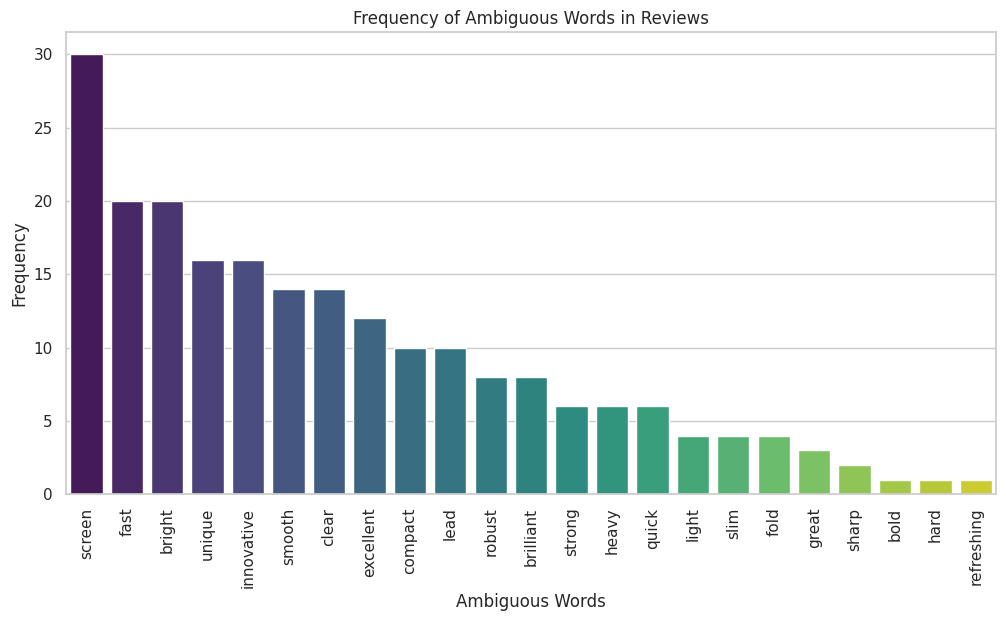

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot ambiguous words frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=ambiguous_words_df['Word'], y=ambiguous_words_df['Frequency'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Frequency of Ambiguous Words in Reviews')
plt.xlabel('Ambiguous Words')
plt.ylabel('Frequency')
plt.show()


### **Key Achievements:**
1. **Corpus Collection and Sense Identification:** Successfully compiled a corpus of example sentences from a product review context (Samsung ZFold). Identified the multiple senses of key open-class words (e.g., "light," "screen," "fold," "fast," "robust") using WordNet, demonstrating the complexity of word meanings in different contexts.
   
2. **Implementation of Lesk Algorithm:** Implemented the Lesk Algorithm for Word Sense Disambiguation (WSD) to automatically identify the correct sense of ambiguous words within the context of the given sentences.

3. **Creation of Synthetic Dataset:** Developed a synthetic dataset of 142 product reviews, specifically designed to contain ambiguous words, which provided a robust dataset for testing and evaluating the Lesk Algorithm's performance in disambiguation tasks.

4. **Data Analysis and Visualization:** Utilized various Python libraries (Pandas, Seaborn, Matplotlib) to analyze and visualize the frequency of ambiguous words in the dataset, facilitating a deeper understanding of word sense patterns.

5. **Handling Ambiguity in NLP Tasks:** Addressed the challenge of ambiguity in Natural Language Processing (NLP) by effectively applying disambiguation techniques, highlighting the importance of context in determining word meaning.

---

### **Insights:**
- **Ambiguity Prevalence:** The analysis showed that common words like "light," "screen," and "fold" frequently appear in product reviews with multiple meanings, emphasizing the need for effective WSD methods in NLP tasks.
- **Contextual Importance:** The Lesk Algorithm's performance demonstrated that accurate word sense disambiguation heavily relies on contextual information. Words with more senses (e.g., "light" with 3 senses) posed a greater challenge for disambiguation, as the algorithm had to consider multiple potential meanings.
- **Real-World Application:** The synthetic dataset and WSD implementation provided practical insights into how NLP techniques can be applied to real-world text data, such as product reviews, where accurate interpretation of language is critical for tasks like sentiment analysis, recommendation systems, and customer feedback analysis.

### **Conclusion:**
The Word Sense Disambiguation (WSD) exercise highlighted the complexities and challenges involved in interpreting ambiguous words in natural language processing tasks. By leveraging the Lesk Algorithm and a carefully constructed dataset, this assignment demonstrated the importance of context in accurately determining word meanings. The project not only enhanced technical skills in implementing and evaluating WSD techniques but also provided practical insights into their application in real-world scenarios, such as analyzing product reviews. Future work could explore more advanced disambiguation techniques or incorporate machine learning models to improve WSD accuracy and efficiency.

---
---